In [1]:
df_groceries <- read.csv("./datasets/Groceries_dataset.csv")
str(df_groceries)
dat<-data.frame(df_groceries)
dim(dat)

'data.frame':	38765 obs. of  3 variables:
 $ Member_number  : int  1808 2552 2300 1187 3037 4941 4501 3803 2762 4119 ...
 $ Date           : Factor w/ 728 levels "01-01-2014","01-01-2015",..: 494 98 450 288 4 316 178 552 462 268 ...
 $ itemDescription: Factor w/ 167 levels "abrasive cleaner",..: 156 165 109 102 165 122 102 112 165 156 ...


[1] 38765     3

In [2]:
head(df_groceries)

Member_number,Date,itemDescription
1808,21-07-2015,tropical fruit
2552,05-01-2015,whole milk
2300,19-09-2015,pip fruit
1187,12-12-2015,other vegetables
3037,01-02-2015,whole milk
4941,14-02-2015,rolls/buns


In [3]:
print(typeof(df_groceries))
print(typeof(dat))

[1] "list"
[1] "list"


In [4]:
df_sorted <- df_groceries[order(df_groceries$Member_number),]

#convert member number to numeric
df_sorted$Member_number <- as.numeric(df_sorted$Member_number)


#convert item description to categorical format

df_sorted$itemDescription <- as.factor(df_sorted$itemDescription)

str(df_sorted)

head(df_sorted)

'data.frame':	38765 obs. of  3 variables:
 $ Member_number  : num  1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 ...
 $ Date           : Factor w/ 728 levels "01-01-2014","01-01-2015",..: 634 566 342 598 342 563 634 566 342 598 ...
 $ itemDescription: Factor w/ 167 levels "abrasive cleaner",..: 138 19 130 130 165 165 108 92 132 72 ...


,Member_number,Date,itemDescription
1630,1000,27-05-2015,soda
2048,1000,24-07-2015,canned beer
4844,1000,15-03-2015,sausage
6389,1000,25-11-2015,sausage
8396,1000,15-03-2015,whole milk
13332,1000,24-06-2014,whole milk


In [5]:
#convert dataframe to transaction format using ddply; 

library(plyr)
library(dplyr)

if(sessionInfo()['basePkgs']=="dplyr" | sessionInfo()['otherPkgs']=="dplyr"){
  detach(package:dplyr, unload=TRUE)
}

#group all the items that were bou?ht together; by the same customer on the same date
library(plyr)
df_itemList <- ddply(df_groceries, c("Member_number","Date"), function(df1)paste(df1$itemDescription,collapse = ","))
df_itemList <- ddply(dat, c("Member_number","Date"), function(df1)paste(df1$itemDescription,collapse = ","))

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [6]:
#remove member number and date
df_itemList$Member_number <- NULL
df_itemList$Date <- NULL

colnames(df_itemList) <- c("itemList")

#write to csv format
write.csv(df_itemList,"ItemList100.csv",quote = FALSE, row.names = TRUE)

In [7]:
source("./ins_paquetes.R")
ins_paquetes('arules', 'reshape2', 'arulesViz')

Warning message:
"package 'arules' was built under R version 3.6.3"
Attaching package: 'arules'

The following object is masked from 'package:dplyr':

    recode

The following objects are masked from 'package:base':

    abbreviate, write

Warning message:
"package 'arulesViz' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



Bellow Packages Successfully Installed:

   arules  reshape2 arulesViz 
     TRUE      TRUE      TRUE 


In [8]:
#-------------------- association rule mining algorithm : apriori -------------------------#

#load package required
library(arules)

In [9]:
#convert csv file to basket format
txn = read.transactions(file="ItemList100.csv", rm.duplicates= FALSE, format="basket",sep=",",cols=1);
print(typeof(txn)) 

#remove quotes from transactions
txn@itemInfo$labels
txn@itemInfo$labels <- gsub("\"","",txn@itemInfo$labels)
#sub and gsub return a character vector of the same length 
#and with the same attributes as x (after possible coercion to character)
#gsub(pattern, replacement, x, ignore.case = FALSE, perl = FALSE,
#fixed = FALSE, useBytes = FALSE)


#run apriori algorithm
basket_rules <- apriori(txn,parameter = list(minlen=2,sup = 0.001, conf = 0.01, target="rules"))
#ba?ket_rules <- apriori(txn,parameter = list(minlen=2,sup = 0.00001, conf = 0.01, target="rules"),appearance = list(lhs = "CLEMENTINES")))

#check if tm is attched; if yes then detach
if(sessionInfo()['basePkgs']=="tm" | sessionInfo()['otherPkgs']=="tm"){
  detach(package:sentiment, unload=TRUE)
  detach(package:tm, unload=TRUE)
}

Warning message in asMethod(object):
"removing duplicated items in transactions"

[1] "S4"


[1] "abrasive cleaner"          "artif. sweetener"         
  [3] "baby cosmetics"            "bags"                     
  [5] "baking powder"             "bathroom cleaner"         
  [7] "beef"                      "berries"                  
  [9] "beverages"                 "bottled beer"             
 [11] "bottled water"             "brandy"                   
 [13] "brown bread"               "butter"                   
 [15] "butter milk"               "cake bar"                 
 [17] "candles"                   "candy"                    
 [19] "canned beer"               "canned fish"              
 [21] "canned fruit"              "canned vegetables"        
 [23] "cat food"                  "cereals"                  
 [25] "chewing gum"               "chicken"                  
 [27] "chocolate"                 "chocolate marshmallow"    
 [29] "citrus fruit"              "cleaner"                  
 [31] "cling film/bags"           "cocoa drinks"             
 [33] "coffee"                    "condensed milk"           
 [35] "cooking chocolate"         "cookware"                 
 [37] "cream"                     "cream cheese"             
 [39] "curd"                      "curd cheese"              
 [41] "decalcifier"               "dental care"              
 [43] "dessert"                   "detergent"                
 [45] "dish cleaner"              "dishes"                   
 [47] "dog food"                  "domestic eggs"            
 [49] "female sanitary products"  "finished products"        
 [51] "fish"                      "flour"                    
 [53] "flower (seeds)"            "flower soil/fertilizer"   
 [55] "frankfurter"               "frozen chicken"           
 [57] "frozen dessert"            "frozen fish"              
 [59] "frozen fruits"             "frozen meals"             
 [61] "frozen potato products"    "frozen vegetables"        
 [63] "fruit/vegetable juice"     "grapes"                   
 [65] "hair spray"                "ham"                      
 [67] "hamburger meat"            "hard cheese"              
 [69] "herbs"                     "honey"                    
 [71] "house keeping products"    "hygiene articles"         
 [73] "ice cream"                 "instant coffee"           
 [75] "Instant food products"     "itemList"                 
 [77] "jam"                       "ketchup"                  
 [79] "kitchen towels"            "kitchen utensil"          
 [81] "light bulbs"               "liqueur"                  
 [83] "liquor"                    "liquor (appetizer)"       
 [85] "liver loaf"                "long life bakery product" 
 [87] "make up remover"           "male cosmetics"           
 [89] "margarine"                 "mayonnaise"               
 [91] "meat"                      "meat spreads"             
 [93] "misc. beverages"           "mustard"                  
 [95] "napkins"                   "newspapers"               
 [97] "nut snack"                 "nuts/prunes"              
 [99] "oil"                       "onions"                   
[101] "organic products"          "organic sausage"          
[103] "other vegetables"          "packaged fruit/vegetables"
[105] "pasta"                     "pastry"                   
[107] "pet care"                  "photo/film"               
[109] "pickled vegetables"        "pip fruit"                
[111] "popcorn"                   "pork"                     
[113] "pot plants"                "potato products"          
[115] "preservation products"     "processed cheese"         
[117] "prosecco"                  "pudding powder"           
[119] "ready soups"               "red/blush wine"           
[121] "rice"                      "roll products"            
[123] "rolls/buns"                "root vegetables"          
[125] "rubbing alcohol"           "rum"                      
[127] "salad dressing"            "salt"                     
[129] "salty snack"               

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.01    0.1    1 none FALSE            TRUE       5   0.001      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 14 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[168 item(s), 14964 transaction(s)] done [0.00s].
sorting and recoding items ... [149 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [1186 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [10]:
#view rules
inspect(basket_rules)

       lhs                              rhs                         support    
[1]    {frozen fish}                 => {whole milk}                0.001069233
[2]    {seasonal products}           => {rolls/buns}                0.001002406
[3]    {pot plants}                  => {other vegetables}          0.001002406
[4]    {pot plants}                  => {whole milk}                0.001002406
[5]    {pasta}                       => {whole milk}                0.001069233
[6]    {pickled vegetables}          => {whole milk}                0.001002406
[7]    {packaged fruit/vegetables}   => {rolls/buns}                0.001202887
[8]    {rolls/buns}                  => {packaged fruit/vegetables} 0.001202887
[9]    {detergent}                   => {yogurt}                    0.001069233
[10]   {yogurt}                      => {detergent}                 0.001069233
[11]   {detergent}                   => {rolls/buns}                0.001002406
[12]   {detergent}                   => 

In [11]:
#convert to datframe and view; optional
df_basket <- as(basket_rules,"data.frame")
df_basket$confidence <- df_basket$confidence * 100
df_basket$support <- df_basket$support * nrow(df_basket)
#df_basket$support 
#nrow(df_basket)

In [12]:
# Mining rules for recommendations:

# split lhs and rhs into two columns

library(reshape2)
df_basket <- transform(df_basket, rules = colsplit(rules, pattern = "=>", names = c("lhs","rhs")))

# Remove curly brack?ts ar?und rules
df_basket$rules$lhs <- gsub("[[:punct:]]", "", df_basket$rules$lhs)
df_basket$rules$rhs <- gsub("[[:punct:]]", "", df_basket$rules$rhs)

# convert to chracter
df_basket$rules$lhs <- as.character(df_basket$rules$lhs)
df_basket$rules$rhs <- as.character(df_basket$rules$rhs)


In [13]:
library(stringi)
library(dplyr)
df_basket$rules %>%
  filter(stri_detect_fixed(lhs, "yogurt")) %>%
  select(rhs)

rhs
detergent
herbs
soft cheese
chewing gum
specialty bar
candy
oil
misc beverages
hard cheese
ham


In [14]:
#plot the rules
library(arulesViz)

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


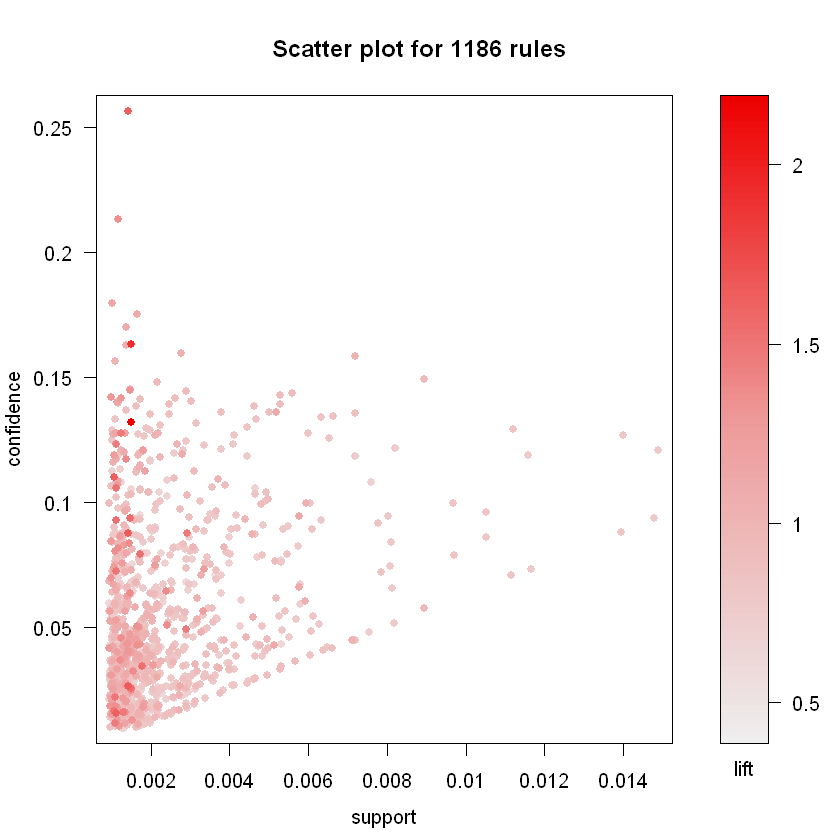

In [15]:
plot(basket_rules)

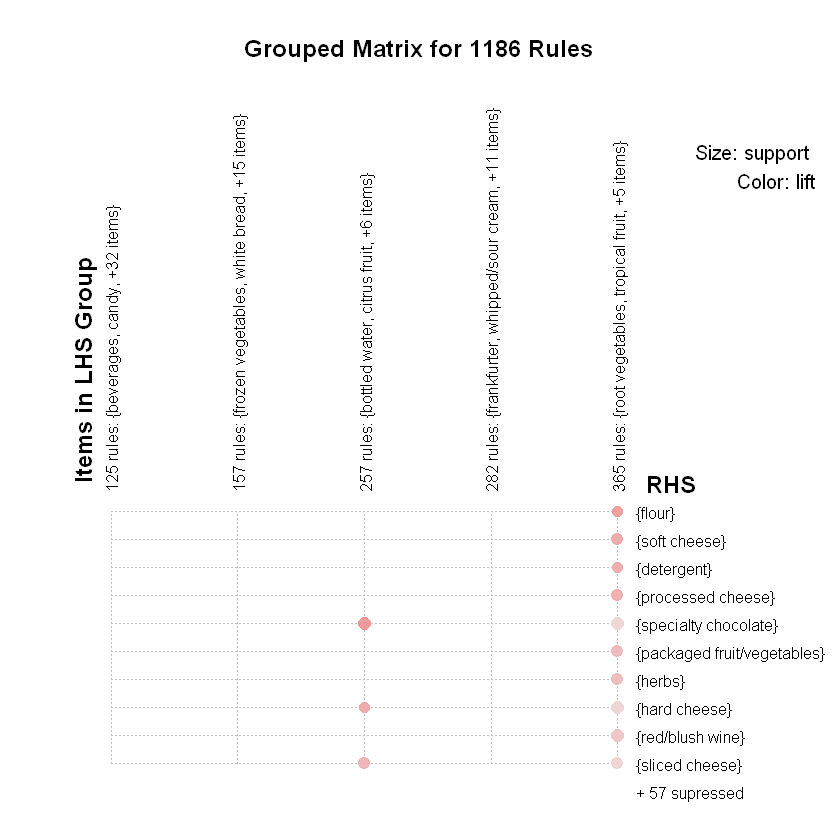

In [16]:
set.seed(8000)
plot(basket_rules, method = "grouped", control = list(k = 5))

Warning message:
"Unknown control parameters: type"

Available control parameters (with default values):
main	 =  Graph for 10 rules
nodeColors	 =  c("#66CC6680", "#9999CC80")
nodeCol	 =  c("#EE0000FF", "#EE0303FF", "#EE0606FF", "#EE0909FF", "#EE0C0CFF", "#EE0F0FFF", "#EE1212FF", "#EE1515FF", "#EE1818FF", "#EE1B1BFF", "#EE1E1EFF", "#EE2222FF", "#EE2525FF", "#EE2828FF", "#EE2B2BFF", "#EE2E2EFF", "#EE3131FF", "#EE3434FF", "#EE3737FF", "#EE3A3AFF", "#EE3D3DFF", "#EE4040FF", "#EE4444FF", "#EE4747FF", "#EE4A4AFF", "#EE4D4DFF", "#EE5050FF", "#EE5353FF", "#EE5656FF", "#EE5959FF", "#EE5C5CFF", "#EE5F5FFF", "#EE6262FF", "#EE6666FF", "#EE6969FF", "#EE6C6CFF", "#EE6F6FFF", "#EE7272FF", "#EE7575FF",  "#EE7878FF", "#EE7B7BFF", "#EE7E7EFF", "#EE8181FF", "#EE8484FF", "#EE8888FF", "#EE8B8BFF", "#EE8E8EFF", "#EE9191FF", "#EE9494FF", "#EE9797FF", "#EE9999FF", "#EE9B9BFF", "#EE9D9DFF", "#EE9F9FFF", "#EEA0A0FF", "#EEA2A2FF", "#EEA4A4FF", "#EEA5A5FF", "#EEA7A7FF", "#EEA9A9FF", "#EEABABFF", "#EEACACFF", "#EEAEAEFF", "#EEB0B0FF", "#EEB1B1FF", "#EEB3B3FF", "#EE

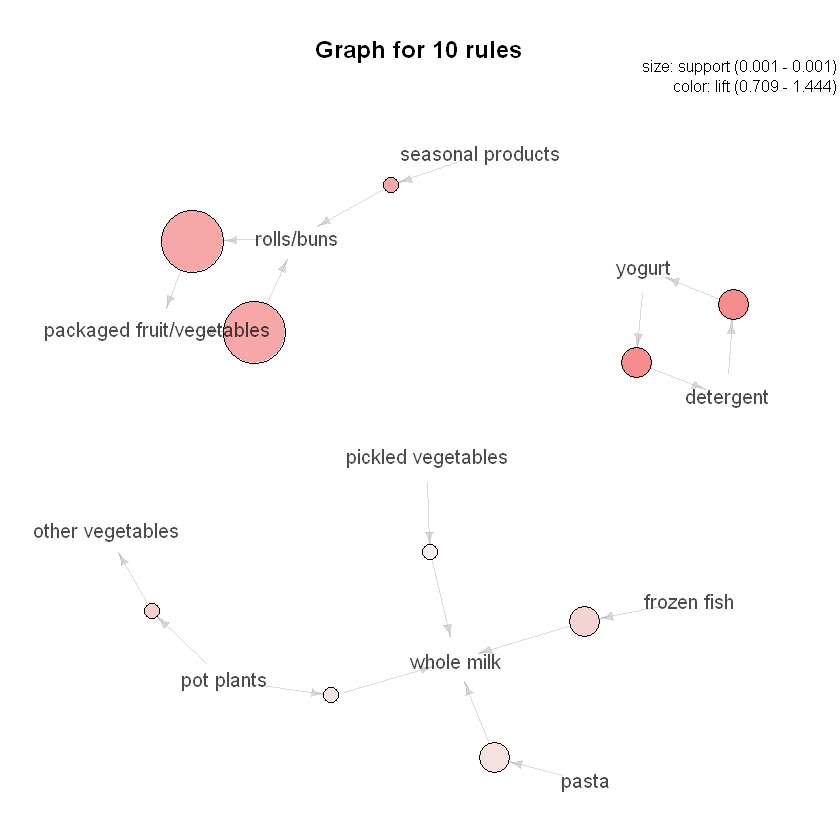

In [17]:
plot(basket_rules[1:10,], method="graph", control=list(type="items"))

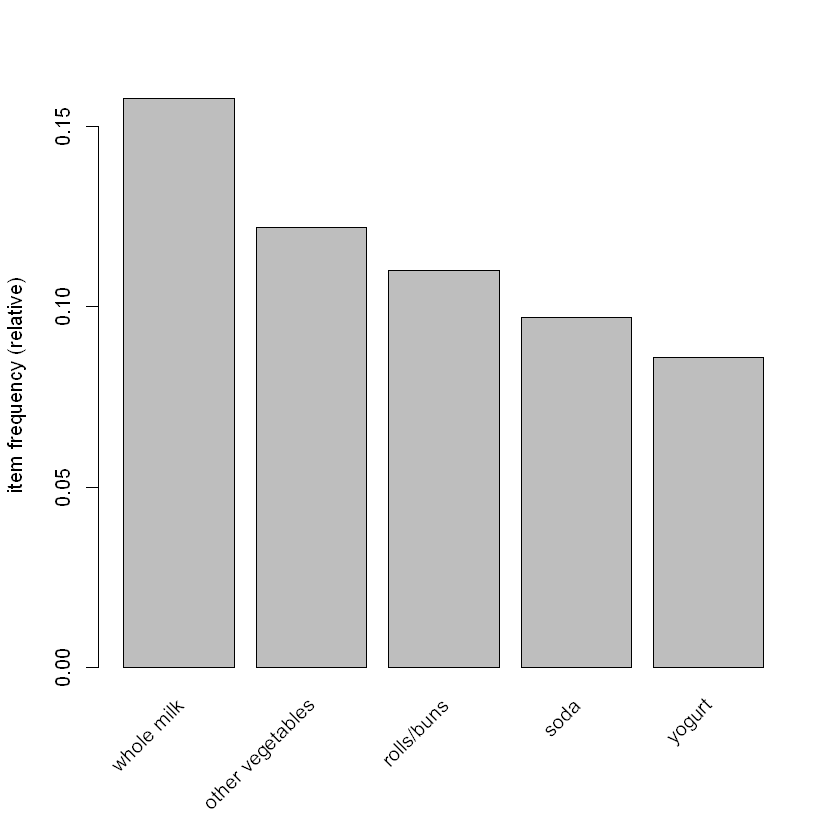

In [18]:
itemFrequencyPlot(txn, topN = 5)

Warning message in plot.rules(basket_rules[1:10, ], measure = c("support", "lift"), :
"The parameter interactive is deprecated. Use engine='interactive' instead."To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


Interactive mode.
Select a region with two clicks!


ERROR: Error in convertUnit(x, unitTo, "x", "location", "x", "location", valueOnly = valueOnly): 'x' argument must be a unit object


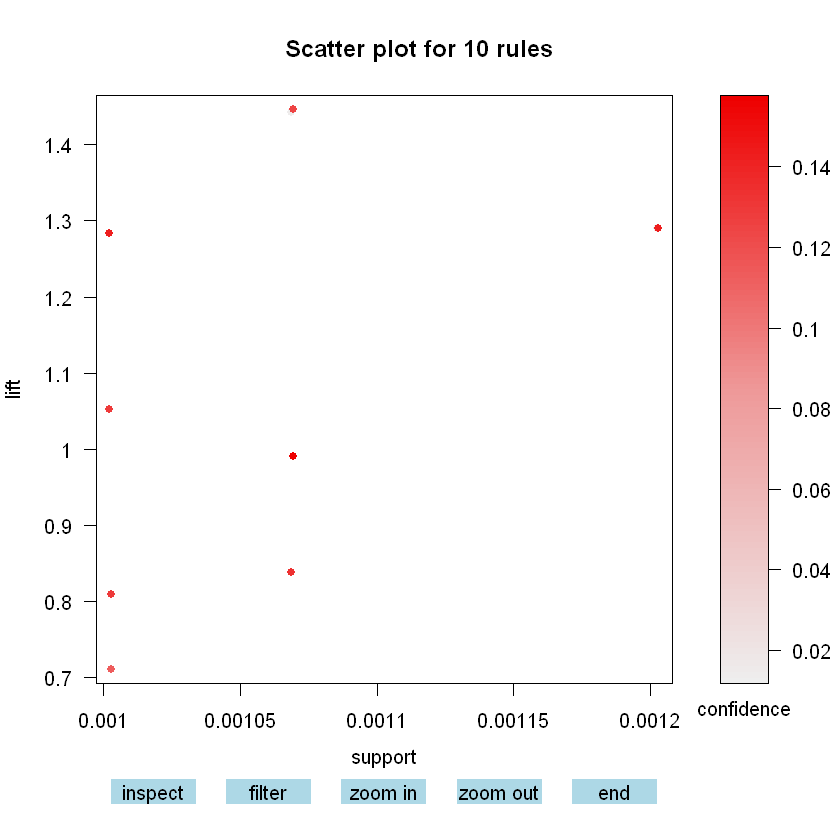

In [19]:
plot(basket_rules[1:10,],measure=c("support","lift"),shading="confidence",interactive=T)